# Modeling

In [14]:
import pandas as pd

df = pd.read_csv('../data/tx_statewide_2020_04_01-002_clean_ml.csv')
df

,location,lat,lng,county_name,subject_race,subject_sex,violation,search_conducted,search_vehicle,vehicle_year,timestamp
0,"route: 0083, milepost: 728",27.426149,-99.479881,Webb County,2,1,1,0.0,0.0,1993,2009-03-05 12:11:00
1,"route: 0035E, milepost: 457",33.140133,-97.048920,Denton County,0,1,0,0.0,0.0,0,2009-03-05 12:11:00
2,"route: 0082, milepost: 616",33.649933,-97.044769,Cooke County,0,1,1,0.0,0.0,2007,2009-03-05 12:11:00
3,"route: 0105, milepost: 664",30.337784,-95.867371,Grimes County,0,1,1,0.0,0.0,2003,2009-03-05 12:11:00
4,"route: 0067, milepost: 586",31.726500,-99.196365,Brown County,0,0,0,0.0,0.0,2008,2009-03-05 12:12:00
...,...,...,...,...,...,...,...,...,...,...,...
19752781,"route: 0027, milepost: 30",33.940784,-101.853981,Hale County,0,0,1,0.0,0.0,0,2008-04-17 13:21:00
19752782,"route: 0021, milepost: 626",NaN,NaN,Burleson County,0,1,0,0.0,0.0,0,2008-04-17 13:21:00
19752783,"route: 0281, milepost: 360",NaN,NaN,Hamilton County,1,1,0,0.0,0.0,0,2008-04-17 13:21:00
19752784,"route: 0070, milepost: 474",34.144417,-99.210335,Wilbarger County,0,1,0,0.0,0.0,0,2008-04-17 13:22:00


In [15]:
df.drop(columns=['location', 'lat', 'lng'], inplace=True)

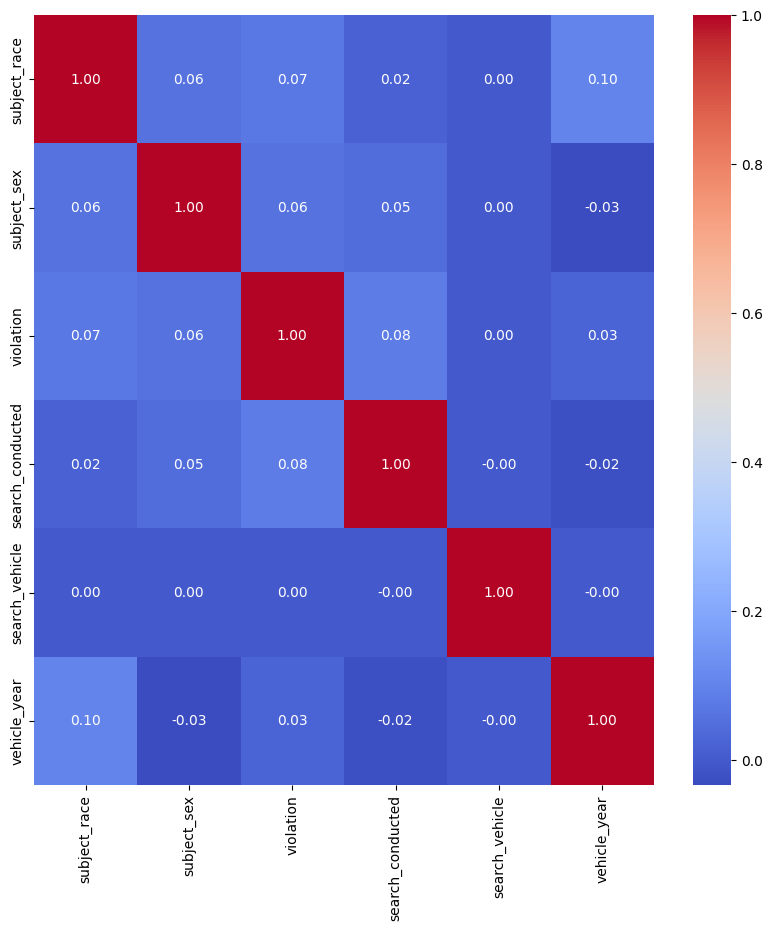

In [16]:
# plot a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])  # only select numeric columns
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [17]:
df

,county_name,subject_race,subject_sex,violation,search_conducted,search_vehicle,vehicle_year,timestamp
0,Webb County,2,1,1,0.0,0.0,1993,2009-03-05 12:11:00
1,Denton County,0,1,0,0.0,0.0,0,2009-03-05 12:11:00
2,Cooke County,0,1,1,0.0,0.0,2007,2009-03-05 12:11:00
3,Grimes County,0,1,1,0.0,0.0,2003,2009-03-05 12:11:00
4,Brown County,0,0,0,0.0,0.0,2008,2009-03-05 12:12:00
...,...,...,...,...,...,...,...,...
19752781,Hale County,0,0,1,0.0,0.0,0,2008-04-17 13:21:00
19752782,Burleson County,0,1,0,0.0,0.0,0,2008-04-17 13:21:00
19752783,Hamilton County,1,1,0,0.0,0.0,0,2008-04-17 13:21:00
19752784,Wilbarger County,0,1,0,0.0,0.0,0,2008-04-17 13:22:00


In [35]:
df_ml = df.copy()

df_ml['county_name'] = df_ml['county_name'].astype('category')
df_ml['county_name'] = df_ml['county_name'].cat.codes
df_ml

,county_name,subject_race,subject_sex,violation,search_conducted,search_vehicle,vehicle_year,timestamp
0,239,2,1,1,0.0,0.0,1993,2009-03-05 12:11:00
1,60,0,1,0,0.0,0.0,0,2009-03-05 12:11:00
2,48,0,1,1,0.0,0.0,2007,2009-03-05 12:11:00
3,92,0,1,1,0.0,0.0,2003,2009-03-05 12:11:00
4,24,0,0,0,0.0,0.0,2008,2009-03-05 12:12:00
...,...,...,...,...,...,...,...,...
19752781,94,0,0,1,0.0,0.0,0,2008-04-17 13:21:00
19752782,25,0,1,0,0.0,0.0,0,2008-04-17 13:21:00
19752783,96,1,1,0,0.0,0.0,0,2008-04-17 13:21:00
19752784,243,0,1,0,0.0,0.0,0,2008-04-17 13:22:00


In [29]:

# make a model to predict the probability of a crime happening based on time and county: a "risk prediction model".

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df_ml = df.copy()

df_ml['county_name'] = df_ml['county_name'].astype('category')
df_ml['county_name'] = df_ml['county_name'].cat.codes

# Assuming 'timestamp' is a datetime object
df_ml['timestamp'] = pd.to_datetime(df_ml['timestamp'])  # convert 'timestamp' to datetime
df_ml['hour'] = df_ml['timestamp'].dt.hour
df_ml['day_of_week'] = df_ml['timestamp'].dt.dayofweek

# Aggregate data
df_ml_agg = df_ml.groupby(['county_name', 'hour', 'day_of_week']).size().reset_index(name='crime_count')

# Normalize crime counts
df_ml_agg['crime_probability'] = df_ml_agg['crime_count'] / df_ml_agg.groupby('county_name')['crime_count'].transform('sum')

# Split the data
features = df_ml_agg[['county_name', 'hour', 'day_of_week']]
target = df_ml_agg['crime_probability']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
r2 = model.score(X_test, y_test)
print(f'R^2: {r2}')

Mean Squared Error: 5.598326161470237e-06
R^2: 0.7175242438918128


In [43]:
# Assuming 'county_name', 'hour', and 'day_of_week' are defined
# Create a new DataFrame with the same structure as your training data
new_data = pd.DataFrame(columns=X_train.columns)

# Set the hour and day_of_week
new_data.loc[0, 'hour'] = hour
new_data.loc[0, 'day_of_week'] = day_of_week

# Set the county_name
# This will set the column for this county to 1 and leave all other county_name columns as 0
new_data.loc[0, 'county_name'] = 48 # 48 = Cooke County

# Fill any remaining NaNs with 0 (these are the other county_name columns)
new_data = new_data.fillna(0)

# Now you can make your prediction
model.predict(new_data)

array([0.00956643])

array([0.00956643])

0.00956643 is the predicted probability of a crime happening in the specified county at the specified hour and day of the week. This is a value between 0 and 1, where 0 would mean the model predicts no chance of a crime occurring, and 1 would mean the model predicts a crime is certain to occur.